## Get Started

We'll start with the obvious:

In [1]:
import nltk

Then we'll import some texts to work with.  If you haven't already (or, if it's been awhile), uncomment and execute the following, and (in a new window), choose to download "all".  It might take a while, but it's worth it to have a lot of texts and tools to play with:

In [2]:
#nltk.download()

Once that is accomplished (close the pop-up window), we can download some texts:

In [3]:
from nltk.corpus import state_union

Let's take a peek at what's inside!

In [4]:
state_union.fileids()

['1945-Truman.txt',
 '1946-Truman.txt',
 '1947-Truman.txt',
 '1948-Truman.txt',
 '1949-Truman.txt',
 '1950-Truman.txt',
 '1951-Truman.txt',
 '1953-Eisenhower.txt',
 '1954-Eisenhower.txt',
 '1955-Eisenhower.txt',
 '1956-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1958-Eisenhower.txt',
 '1959-Eisenhower.txt',
 '1960-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1962-Kennedy.txt',
 '1963-Johnson.txt',
 '1963-Kennedy.txt',
 '1964-Johnson.txt',
 '1965-Johnson-1.txt',
 '1965-Johnson-2.txt',
 '1966-Johnson.txt',
 '1967-Johnson.txt',
 '1968-Johnson.txt',
 '1969-Johnson.txt',
 '1970-Nixon.txt',
 '1971-Nixon.txt',
 '1972-Nixon.txt',
 '1973-Nixon.txt',
 '1974-Nixon.txt',
 '1975-Ford.txt',
 '1976-Ford.txt',
 '1977-Ford.txt',
 '1978-Carter.txt',
 '1979-Carter.txt',
 '1980-Carter.txt',
 '1981-Reagan.txt',
 '1982-Reagan.txt',
 '1983-Reagan.txt',
 '1984-Reagan.txt',
 '1985-Reagan.txt',
 '1986-Reagan.txt',
 '1987-Reagan.txt',
 '1988-Reagan.txt',
 '1989-Bush.txt',
 '1990-Bush.txt',
 '1991-Bush-1.txt',
 '1991-B

Well, our dataset is limited, but it's good enough for us to get started!

We can peer inside one more carefully:

In [5]:
print(state_union.raw('2006-GWBush.txt'))

PRESIDENT GEORGE W. BUSH'S ADDRESS BEFORE A JOINT SESSION OF THE CONGRESS ON THE STATE OF THE UNION
 
January 31, 2006

THE PRESIDENT: Thank you all. Mr. Speaker, Vice President Cheney, members of Congress, members of the Supreme Court and diplomatic corps, distinguished guests, and fellow citizens: Today our nation lost a beloved, graceful, courageous woman who called America to its founding ideals and carried on a noble dream. Tonight we are comforted by the hope of a glad reunion with the husband who was taken so long ago, and we are grateful for the good life of Coretta Scott King. (Applause.)

President George W. Bush reacts to applause during his State of the Union Address at the Capitol, Tuesday, Jan. 31, 2006. White House photo by Eric DraperEvery time I'm invited to this rostrum, I'm humbled by the privilege, and mindful of the history we've seen together. We have gathered under this Capitol dome in moments of national mourning and national achievement. We have served America 

## Proof of Concept

First, we'll create a function that will take a single text, and analyze it for parts of speech.  First we'll import a couple of needed modules:

In [6]:
from collections import Counter
from nltk.text import Text

And then we'll create a function that turns the text to lower case, breaks it into words and punctuation (tokenizing it), then assigns a part of speech for each token and returns the count for each part of speech in a dictionary:

In [7]:
def analyzeTextForPOS (text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text.lower())
    text = nltk.Text(tokens)
    # get parts of speech for each token
    tags = nltk.pos_tag(text)
    # count how many times each pos is used
    counts = Counter(tag for word,tag in tags)
    # note that the POS abbreviations can be understood here:
    # https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
    # return the counts as a dictionary
    return(dict(counts))

Let's try the function to see if we get the kind of output we expect:

In [8]:
analyzeTextForPOS(state_union.raw('2006-GWBush.txt'))

{'NN': 1080,
 'VBD': 44,
 'POS': 13,
 'IN': 725,
 'DT': 525,
 'JJ': 515,
 'CD': 71,
 ',': 319,
 ':': 81,
 'PRP': 218,
 '.': 336,
 'NNS': 422,
 'CC': 300,
 'PRP$': 156,
 'VBN': 110,
 'WP': 19,
 'TO': 175,
 'VBP': 196,
 'RB': 177,
 '(': 68,
 ')': 68,
 'VB': 328,
 'RP': 17,
 'RBS': 4,
 'VBZ': 130,
 'EX': 9,
 'MD': 122,
 'JJR': 44,
 'WDT': 29,
 'VBG': 121,
 'PDT': 5,
 'WRB': 9,
 'RBR': 8,
 '``': 1,
 "''": 1,
 'JJS': 7,
 '$': 4}

The output is a bit confusing.  We can go to the [Penn Treebank homepage]( https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) to find out what these labels mean.  Or, we could do the following, which shows examples:

In [9]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

Looking there, we discover, for example, that PRP is the label for personal pronoun (like *me*, *you*, *they*) and PRP$ is the label for possessive pronoun (like *my*, *your*, *their*).  

Great, but how can we do this for every text, combining where needed (e.g. combining all of a single president's SOTU addresses into one measurement) and comparing where appropriate (Republican vs Democrat, 1960s vs 1980s)?  One approach is to build a table of counts such that we have all the counts for all the texts, and then we can remix as needed for our study.

Note that when we get into analysis like this, there are usually several ways to proceed – so if you would approach the problem differently, that's okay!

## Textual Analysis

We're going to create a function that sets a few things up, then iterates over every file in the state of the union corpus and collects three sets of data:

* The "basic" data of the president's name, the year of the address, and a sequence number, if applicable
* The "part of speech" data that counts each part of speech in that state of the union address
* The total number of parts of speech tagged

We'll then combine these three sets into one single data frame, which we return as the result.

First, we need to load a couple of libraries:


In [10]:
import pandas as pd
import re

And now we'll create the function that does all the good stuff!

In [11]:
def analyzeTexts():

    # Create a pattern for the regular expression (regex)
    # we're going to do further on.
    
    pattern = "(\d+)\-([A-Za-z]+)\-?(\d?)\.txt"
    # This pattern captures the date:     (\d+)
    # Then looks for a dash:              \-
    # Then captures a name:               ([A-Za-z]+)
    # Then looks for an optional dash:    \-?
    # Then captures an optional number:   (\d?)
    # Then looks for the .txt ending:     \.txt

    all_basic_info = []  # list of basic info dicts
    all_pos_info = []    # list of part of speech dicts
    all_totals = []      # list of total POS counted dicts
    
    # Note: we create three lists so that when we assemble
    # a data frame, these three types of information can be
    # placed in order, with basic info followed by pos counts
    # followed by total.  Since dicts are inherently unordered,
    # if we did a single list, we'd end up with columns in 
    # alphabetical order, which is not what we want.

    
    # iterate over files and extract and organize data
    
    for filename in state_union.fileids():
        address_details = {}    # empty dict
        pos = {}                # empty dict
        totals = {}             # empty dict
        
        # Below, we're going to use  regular expressions to 
        # extract meaningful info from the file name.
        
        m = re.match(pattern, filename)
        if m:
            address_details['address_date'] = m.group(1)
            address_details['president_name'] = m.group(2)
            address_details['optional_sequence'] = m.group(3)
            all_basic_info.append(address_details)  # add details of this file
            
            pos = analyzeTextForPOS(state_union.raw(filename))
            all_pos_info.append(pos)                # add part of speech for this file
            
            totals['Total'] = sum(pos.values())
            all_totals.append(totals)               # add total POS for this file

        else:
            print("Wonky problem with filename " + filename)
        
    return(pd.DataFrame(all_basic_info).join(pd.DataFrame(all_pos_info).join(pd.DataFrame(all_totals))))
    # return the results in a data frame -- leftmost columns are basic info,
    # then the part of speech info, then the totals in the rightmost column.

Now, let’s execute that function!

In [12]:
sotu_data = analyzeTexts()

Take a peek at what we’ve built:

In [13]:
sotu_data

address_date optional_sequence president_name     $    ''     (     )  \
0          1945                           Truman   NaN   2.0   NaN   NaN   
1          1946                           Truman   6.0  14.0  50.0  50.0   
2          1947                           Truman   NaN   4.0   1.0   1.0   
3          1948                           Truman  13.0   NaN   NaN   NaN   
4          1949                           Truman   3.0   2.0   NaN   NaN   
5          1950                           Truman   4.0   NaN   NaN   NaN   
6          1951                           Truman   1.0   1.0   NaN   NaN   
7          1953                       Eisenhower   NaN   NaN  12.0  12.0   
8          1954                       Eisenhower   4.0   NaN   6.0   6.0   
9          1955                       Eisenhower   4.0   3.0   NaN   NaN   
10         1956                       Eisenhower   NaN   NaN   NaN   NaN   
11         1957                       Eisenhower   NaN   NaN   4.0   4.0   
12         1958                       Eisenhower   3.0   5.0   NaN   NaN   
13         1959                       Eisenhower   3.0   1.0   NaN   NaN   
14         1960                       Eisenhower   3.0   5.0   NaN   NaN   
15         1961                          Kennedy   NaN   3.0   NaN   NaN   
16         1962                          Kennedy   7.0  12.0   NaN   NaN   
17         1963                          Johnson   NaN   2.0   NaN   NaN   
18         1963                          Kennedy  12.0   4.0   NaN   NaN   
19         1964                          Johnson  14.0   2.0   NaN   NaN   
20         1965                 1        Johnson   2.0   3.0   1.0   1.0   
21         1965                 2        Johnson   NaN   8.0   NaN   NaN   
22         1966                          Johnson  19.0   NaN   1.0   1.0   
23         1967                          Johnson  24.0  22.0   NaN   NaN   
24         1968                          Johnson  35.0   1.0   NaN   NaN   
25         1969                          Johnson  13.0   7.0   NaN   NaN   
26         1970                            Nixon   6.0   NaN   NaN   NaN   
27         1971                            Nixon   4.0   NaN   NaN   NaN   
28         1972                            Nixon   1.0   NaN   NaN   NaN   
29         1973                            Nixon   NaN   NaN   NaN   NaN   
..          ...               ...            ...   ...   ...   ...   ...   
35         1979                           Carter   3.0   8.0   NaN   NaN   
36         1980                           Carter   NaN   2.0   NaN   NaN   
37         1981                           Reagan  27.0   3.0   NaN   NaN   
38         1982                           Reagan  10.0  14.0   NaN   NaN   
39         1983                           Reagan   4.0   5.0   NaN   NaN   
40         1984                           Reagan   7.0   5.0   NaN   NaN   
41         1985                           Reagan   4.0   4.0   NaN   NaN   
42         1986                           Reagan   2.0   4.0   NaN   NaN   
43         1987                           Reagan   4.0  17.0   NaN   NaN   
44         1988                           Reagan   5.0   7.0   1.0   2.0   
45         1989                             Bush   8.0  19.0   NaN   NaN   
46         1990                             Bush   3.0   4.0   NaN   NaN   
47         1991                 1           Bush   4.0   2.0   NaN   NaN   
48         1991                 2           Bush   NaN   4.0   NaN   NaN   
49         1992                             Bush  12.0   8.0   NaN   NaN   
50         1993                          Clinton  19.0   2.0   NaN   NaN   
51         1994                          Clinton   6.0  11.0   NaN   NaN   
52         1995                          Clinton  14.0   9.0   NaN   NaN   
53         1996                          Clinton   6.0   3.0   NaN   NaN   
54         1997                          Clinton   6.0   3.0   NaN   NaN   
55         1998                          Clinton   

Keep in mind that the numbers in the part of speech columns are just counts!  We'll have to figure out percentages, since we want to compare the relative frequency of parts of speech.

Also, we want to combine the part of speech counts and the total parts of speech counted for each president – so, all of Nixon's SOTU speeches combined into one count, etc.  The reason for this is that the number of speeches for each president are unbalanced.  If we don't combine them, we risk over-weighting the influence of one president compared to another in our statistical analysis.

We also have too many parts of speech to work with.  We really want to work with just a handful.  

So, we have to slim down and consolidate our large data frame.  We can do this by indexing and by using the pandas groupby function.

We'll do this in steps.  First, we'll get all rows and just the columns starting with president_name forward.


In [14]:
sotu_by_president = sotu_data.loc[:,'president_name':] # Select all rows, and columns from president_name forward

Then we'll aggregate (combine rows) by president name:

In [15]:
sotu_by_president = sotu_by_president.groupby('president_name').sum() # sum each president's data

Let's take a peek so far:

In [16]:
sotu_by_president

$    ''      (      )     ,     .    :    CC    CD    DT  \
president_name                                                                 
Bush             27.0  37.0    0.0    0.0  1176  1216  262  1024   226  2257   
Carter           13.0  11.0    0.0    0.0   580   571   53   600   130  1231   
Clinton          82.0  60.0    0.0    0.0  3327  3075  415  2514   937  5932   
Eisenhower       17.0  14.0   22.0   22.0  2143  2275  397  1919   473  5399   
Ford             40.0   7.0    0.0    0.0   641   685  129   585   279  1432   
GWBush           33.0  26.0  410.0  410.0  1934  2134  452  1699   423  3060   
Johnson         107.0  45.0    2.0    2.0  1495  1724  565  1662   576  3912   
Kennedy          19.0  19.0    0.0    0.0   950   704  376   982   250  1955   
Nixon            17.0   0.0    0.0    0.0   953   817   66   710   302  2423   
Reagan           63.0  59.0    1.0    2.0  1997  1826  422  1674   625  3692   
Truman           27.0  23.0   51.0   51.0  2035  2455  190  1983  1136  5997   

                ...     VBG   VBN   VBP   VBZ  WDT   WP   WP$  WRB    ``  \
president_name  ...                                                        
Bush            ...     281   379   716   532  123  121   5.0   82  38.0   
Carter          ...     138   252   337   233   80   34   1.0   34  11.0   
Clinton         ...    1027   928  2412  1139  305  393   9.0  219  56.0   
Eisenhower      ...     784  1268  1122  1063  308   65  12.0   73  15.0   
Ford            ...     217   298   420   261   86   32   0.0   34   7.0   
GWBush          ...     654   698  1123   802  163  144   2.0   80  22.0   
Johnson         ...     462   788  1099   703  203  145  10.0  105  35.0   
Kennedy         ...     288   421   468   440  100   52   9.0   39  18.0   
Nixon           ...     336   432   573   392  203   81   3.0   67   0.0   
Reagan          ...     723   785  1130   840  210  176  12.0  120  55.0   
Truman          ...     805  1584  1391  1048  391   95   6.0   97  24.0   

                Total  
president_name         
Bush            23740  
Carter          12690  
Clinton         68755  
Eisenhower      53358  
Ford            15462  
GWBush          38471  
Johnson         39145  
Kennedy         20161  
Nixon           21575  
Reagan          41741  
Truman          58076  

[11 rows x 44 columns]

And we'll limit to just comparative and superlative adjectives and adverbs.  But we'll also hang on to 'Total', because that allows us to determine the percentage of speech that each part of speech takes up.

In [17]:
cols_i_want = ['JJR', 'JJS','RBR','RBS', 'Total'] # Select four parts of speech
sotu_by_president = sotu_by_president.loc[:,cols_i_want]

We'll separate out republicans from democrats:

In [18]:
republicans = ['Bush','Eisenhower','Ford','Nixon','Reagan','GWBush']
democrats = ['Carter','Clinton','Johnson','Kennedy','Truman']

republican_speech = sotu_by_president.loc[sotu_by_president.index.isin(republicans)]
democrat_speech = sotu_by_president.loc[sotu_by_president.index.isin(democrats)]

Let's take a quick peek:

In [19]:
republican_speech

JJR  JJS  RBR   RBS  Total
president_name                            
Bush            102   44   41  12.0  23740
Eisenhower      212   80  100  43.0  53358
Ford             96   42   46  12.0  15462
GWBush          210   72   55  22.0  38471
Nixon           116   49   62  23.0  21575
Reagan          215   98   79  29.0  41741

In [20]:
democrat_speech

JJR  JJS  RBR   RBS  Total
president_name                            
Carter           65   26   21   9.0  12690
Clinton         457  230  166  55.0  68755
Johnson         206  105   64  30.0  39145
Kennedy          76   39   39  15.0  20161
Truman          217   99   67  35.0  58076

Now we have some nice, compact data frames!  We still have to figure out percentages, however.  We'll divide everything by the 'Total' column:

In [21]:
democrat_speech = democrat_speech.div(democrat_speech['Total'], axis=0)
republican_speech = republican_speech.div(republican_speech['Total'], axis=0)

## Statistical Analysis

Do Republicans and Democrats differ in the way they use comparative and superlative adjectives and adverbs in their State of the Union addresses?  Let's take each type of part of speech separately and compare them, then sum all four parts of speech and make an overall comparison as well.  We'll visualize differences using a box plot, and also conduct a two-sample T test.

We'll need some additional python libraries, and need to set up some plot parameters to display our visualizations in our Jupyter Notebook:

In [22]:
from scipy.stats import ttest_ind
from statistics import mean, stdev
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 18})

And now we'll plot the comparative adjective use of both groups.

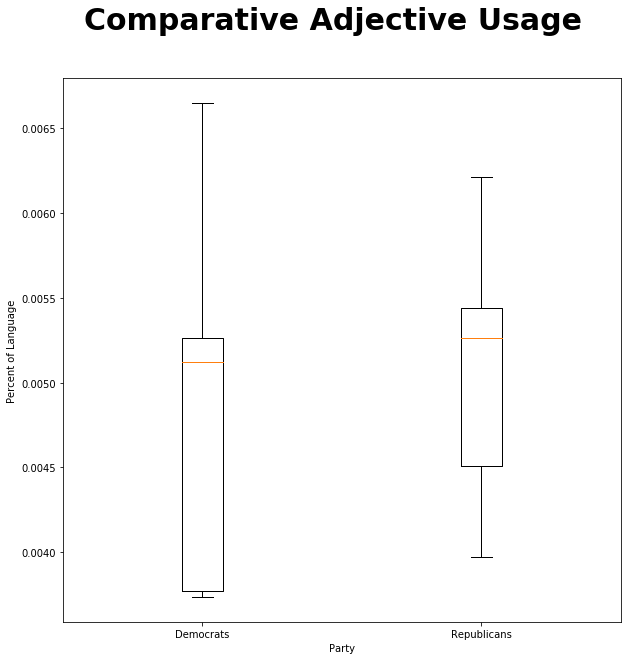

In [23]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparative Adjective Usage', fontsize=30, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot([democrat_speech["JJR"],republican_speech["JJR"]], labels=["Democrats", "Republicans"])

ax.set_xlabel('Party')
ax.set_ylabel('Percent of Language')

plt.show()

It doesn't look very promising -- these distributions overlap rather a lot!  Let's do a T test to see if the difference is likely due to random variation:

In [24]:
ttest_ind(republican_speech["JJR"],democrat_speech["JJR"])

Ttest_indResult(statistic=0.27734514630142165, pvalue=0.7877802746796846)

That's a very high p value.  78.8% probability that the differences we see are due to random chance, not a true group difference.

Let's move on to superlative adjectives!

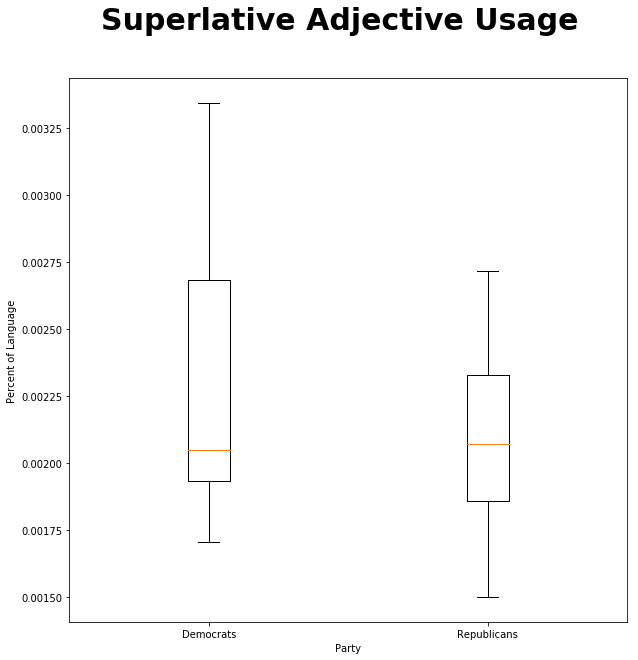

In [25]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Superlative Adjective Usage', fontsize=30, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot([democrat_speech["JJS"],republican_speech["JJS"]], labels=["Democrats", "Republicans"])

ax.set_xlabel('Party')
ax.set_ylabel('Percent of Language')

plt.show()

In [26]:
ttest_ind(republican_speech["JJS"],democrat_speech["JJS"])

Ttest_indResult(statistic=-0.7498826364182734, pvalue=0.47247171059893134)

Once again, both visually and statistically, there's no significant difference.  Let's do the same for both comparative and superlative adjectives!

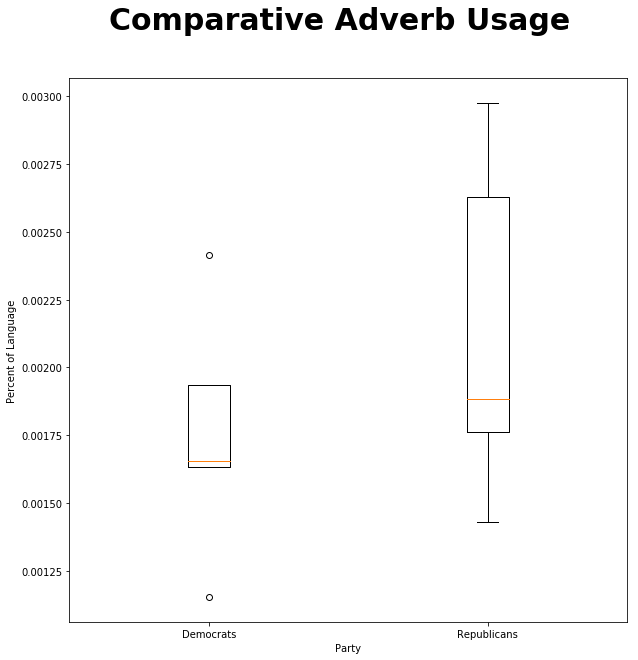

In [27]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparative Adverb Usage', fontsize=30, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot([democrat_speech["RBR"],republican_speech["RBR"]], labels=["Democrats", "Republicans"])

ax.set_xlabel('Party')
ax.set_ylabel('Percent of Language')

plt.show()

In [28]:
ttest_ind(republican_speech["RBR"],democrat_speech["RBR"])

Ttest_indResult(statistic=1.0781202441947808, pvalue=0.30902662581074575)

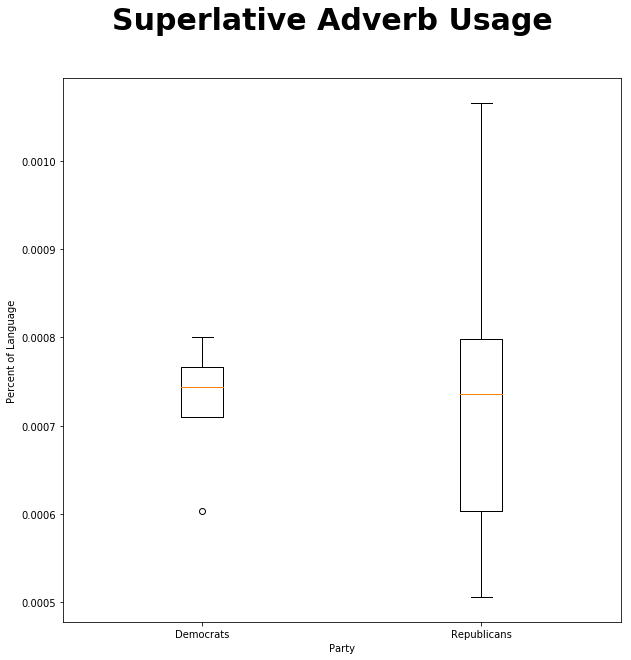

In [29]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Superlative Adverb Usage', fontsize=30, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot([democrat_speech["RBS"],republican_speech["RBS"]], labels=["Democrats", "Republicans"])

ax.set_xlabel('Party')
ax.set_ylabel('Percent of Language')

plt.show()

In [30]:
ttest_ind(republican_speech["RBS"],democrat_speech["RBS"])

Ttest_indResult(statistic=0.12929601859348358, pvalue=0.8999668706431508)

Well, none of the individual parts of speech were notably different, but what if we sum them?

In [31]:
republican_all = republican_speech["JJR"] + republican_speech["JJS"] + republican_speech["RBR"] + republican_speech["RBS"]
democrat_all = democrat_speech["JJR"] + democrat_speech["JJS"] + democrat_speech["RBR"] + democrat_speech["RBS"]

ttest_ind(republican_all,democrat_all)

Ttest_indResult(statistic=0.2468003972480926, pvalue=0.8106000875259137)

Nope, no finding here.  It looks like we can reject my hypothesis that presidential speakers of different parties express different concentrations of comparative and superlative adjectives and adverbs!

How could this investigation have been done better?  Well, we'd ideally like more text from more presidents -- maybe get all of the SOTU addresses instead of a small chunk of years, or add in other texts.  We also want to be careful to remove annotations like "(Applause)" and photo credits, which aren't really part of the presidential address.  We didn't do that here. There are lots of ways to remix this.  Let me know what you come up with and if you use this technique in your research!